In [928]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [929]:
# Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [930]:
# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

In [931]:
# Flatten the images from 28x28 to 1D vectors of size 784
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [932]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [933]:
# Step 4: Visualize some images and their labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

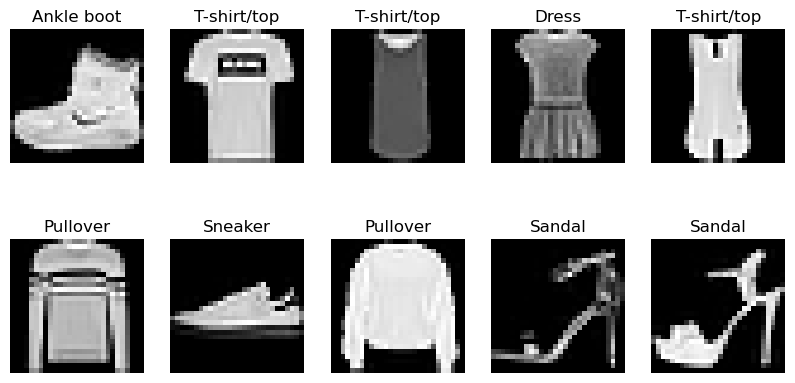

In [934]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [935]:
# Creating the ANN model with Batch Normalization and Dropouts
model = models.Sequential([
    layers.Input(shape=(784,)),
    
    layers.Dense(1024),
    layers.BatchNormalization(),  # Batch normalization before activation
    layers.Activation('relu'),
    layers.Dropout(0.1),  # Dropout for regularization
    
    layers.Dense(512),
    layers.BatchNormalization(),  # Batch normalization before activation
    layers.Activation('relu'),
    #layers.Dropout(0.1),  # Dropout for regularization
    
    layers.Dense(128),
    layers.BatchNormalization(),  # Batch normalization before activation
    layers.Activation('relu'),
    layers.Dropout(0.3),
    
    layers.Dense(64),
    layers.BatchNormalization(),  # Batch normalization before activation
    layers.Activation('relu'),
    #layers.Dropout(0.3),
    
    layers.Dense(32),
    layers.BatchNormalization(),  # Batch normalization before activation
    layers.Activation('relu'),
    #layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation
])

In [936]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [937]:
# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (-epoch / 20))

In [938]:
# Train the model with an 80-20 training-validation split
history = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=20, 
                    batch_size=64,
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
750/750 [==============================] - 14s 16ms/step - loss: 0.5685 - accuracy: 0.8152 - val_loss: 0.4771 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 2/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3972 - accuracy: 0.8572 - val_loss: 0.3784 - val_accuracy: 0.8640 - lr: 8.9125e-04
Epoch 3/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3546 - accuracy: 0.8724 - val_loss: 0.3385 - val_accuracy: 0.8783 - lr: 7.9433e-04
Epoch 4/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3250 - accuracy: 0.8830 - val_loss: 0.4024 - val_accuracy: 0.8614 - lr: 7.0795e-04
Epoch 5/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2955 - accuracy: 0.8911 - val_loss: 0.3371 - val_accuracy: 0.8747 - lr: 6.3096e-04
Epoch 6/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2753 - accuracy: 0.8998 - val_loss: 0.3192 - val_accuracy: 0.8863 - lr: 5.6234e-04
Epoch 7/20
750/750 [==================

In [939]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3090 - accuracy: 0.8981
Test accuracy: 0.8981000185012817


In [940]:
# Generate classification report and confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.80      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.82      0.83      0.83      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.82      0.85      0.84      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.72      0.76      0.74      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



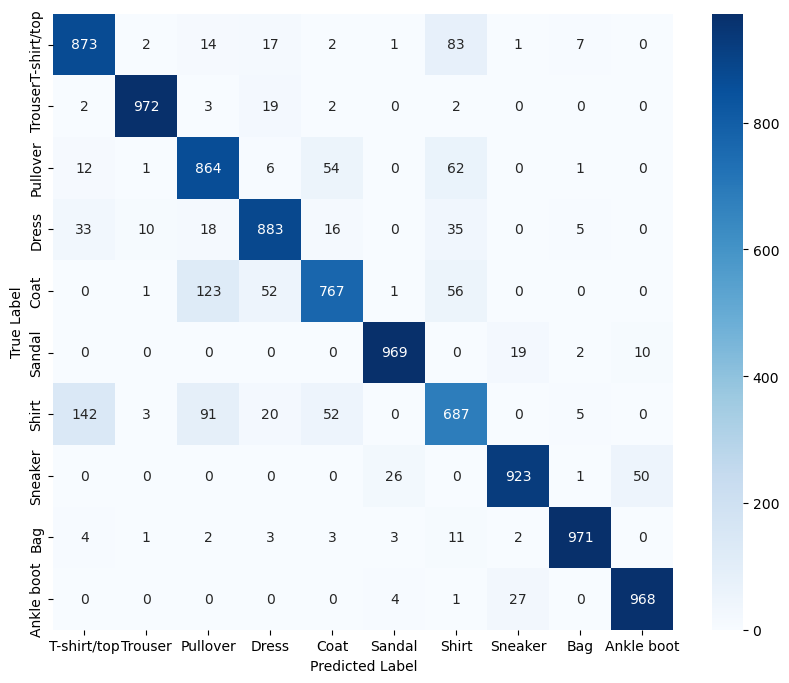

In [1459]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(r"C:\Users\Salma\Desktop\Heat Map.png", format='png')
plt.show()

In [1460]:
# Plotting classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).iloc[:3, :-1].T  # Select only precision, recall, f1-score

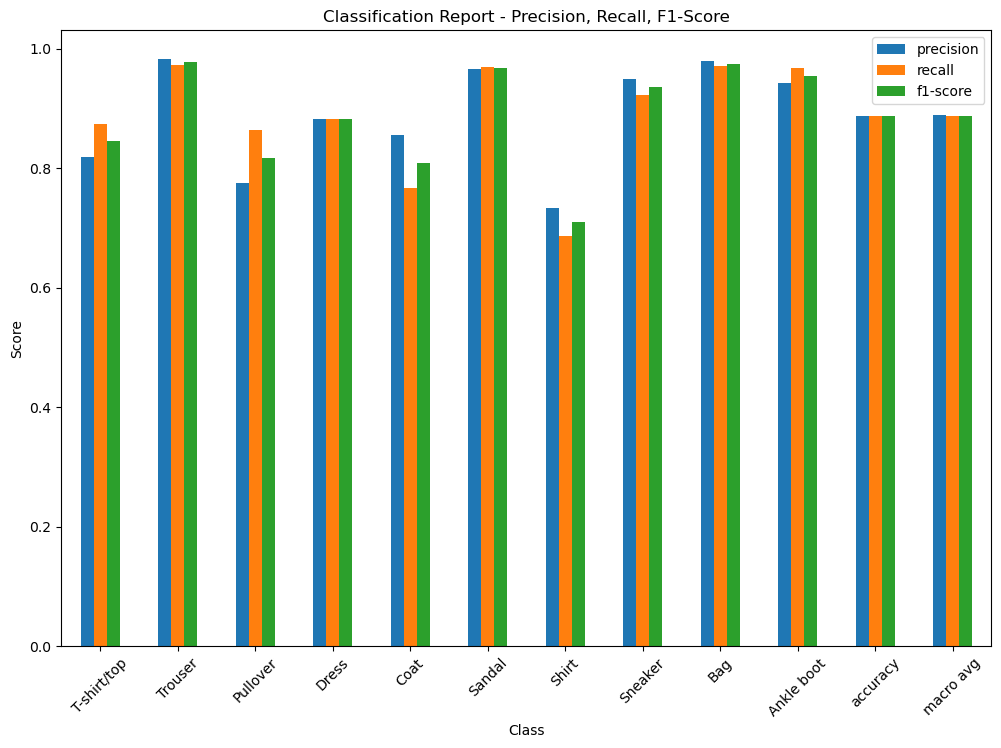

In [1461]:
report_df.plot(kind="bar", figsize=(12, 8))
plt.title("Classification Report - Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\Salma\Desktop\Classification Report.png", format='png')
plt.show()

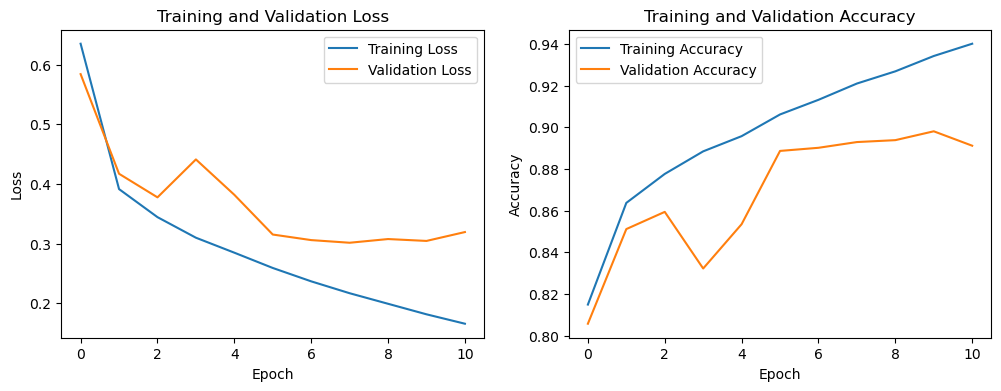

In [1462]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig(r"C:\Users\Salma\Desktop\Training and Validation Loss.png", format='png')
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig(r"C:\Users\Salma\Desktop\Training and Validation Accuracy.png", format='png')
plt.show()